## California Housing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing

%matplotlib inline

In [2]:
# get housing dataset
housing = fetch_california_housing()

data = housing.data
target = housing.target
data_columns = housing.feature_names 
target_name = housing.target_names

In [3]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
# print column names
print("Features columns: ",data_columns)
print("Target column: ",target_name)

Features columns:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target column:  ['MedHouseVal']


In [5]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
# convert to dataframe
df_data = pd.DataFrame(data, columns=data_columns)
df_target = pd.DataFrame(target, columns=target_name)


In [7]:
# show top 10 data rows
df_data.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [8]:
# show top 10 target rows
df_target.head(10)

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
5,2.697
6,2.992
7,2.414
8,2.267
9,2.611


In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [10]:
# check df_data for missing values
df_data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [11]:
# check target for missing values
df_target.isnull().sum()

MedHouseVal    0
dtype: int64

In [12]:
# show statistics summary for features
df_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>, <Axes: >]], dtype=object)

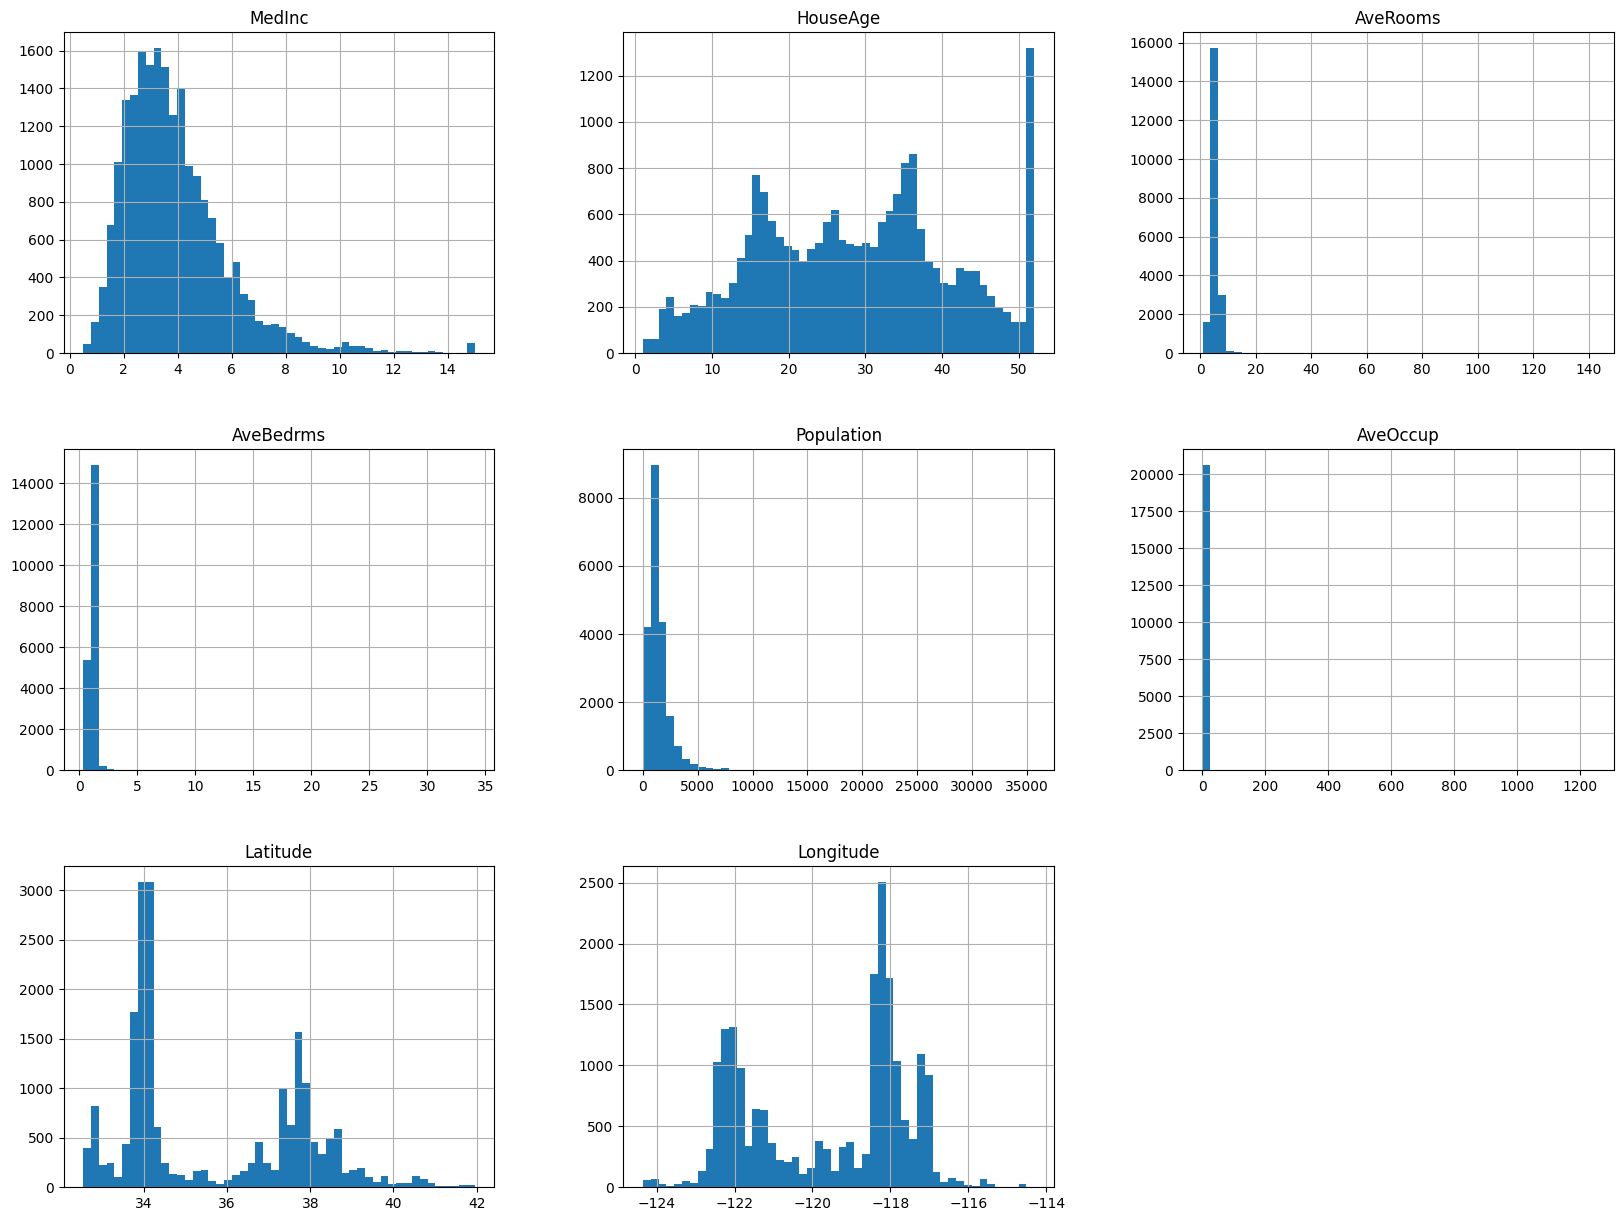

In [13]:
# plot histograms for each features
df_data.hist(bins=50, figsize=(20,15))

Some features is long tail and skewed right

In [14]:
# show statistics summary for target
df_target.describe()

,MedHouseVal
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


array([[<Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

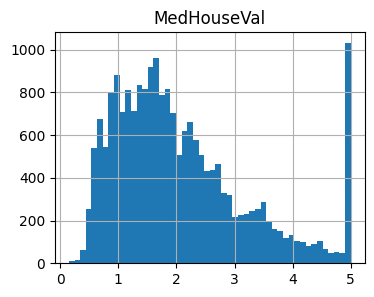

In [15]:
df_target.hist(bins=50, figsize=(4,3))

In [16]:
# declare function to train linear regression model and calculate rmse
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    #print(X)
    #print('')

    XTX = X.T.dot(X)
    #print(XTX)
    #print('')
    XTX_inv = np.linalg.inv(XTX)
    #print(XTX_inv)
    #print('')
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]


def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [17]:
# transform features and target using log1p to reduce skewness

df_data['MedInc'] = np.log1p(df_data['MedInc'] )
df_data['HouseAge'] = np.log1p(df_data['HouseAge'] )
df_data['Population'] = np.log1p(df_data['Population'] )
df_data['AveRooms'] = np.log1p(df_data['AveRooms'] )
df_data['AveOccup'] = np.log1p(df_data['AveOccup'] )
df_data['AveBedrms'] = np.log1p(df_data['AveBedrms'] )

df_target['MedHouseVal'] = np.log1p(df_target['MedHouseVal'] )

### Shuffle and split

In [18]:
n = df_data.shape[0]

# create an array with indices from 0 to n-1
idx = np.arange(n)

# shuffle idx
np.random.seed(42)
np.random.shuffle(idx)

# split train, val, test = 60%, 20%, 20%
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

print(n_train, n_val, n_test)

12384 4128 4128


In [19]:
# create train, val, test dataframes

# train = 0 - n_train
X_train = df_data.iloc[idx[:n_train]]
y_train = df_target.iloc[idx[:n_train]]

# val = n_train - n_train+n_val
X_val = df_data.iloc[idx[n_train:n_train+n_val]]
y_val = df_target.iloc[idx[n_train:n_train+n_val]]

# test = n_train+n_val - n
X_test = df_data.iloc[idx[n_train+n_val:]]
y_test = df_target.iloc[idx[n_train+n_val:]]

# reset index and convert to numpy arrays
X_train = X_train.reset_index(drop=True).to_numpy()
y_train = y_train.reset_index(drop=True).to_numpy()

X_val = X_val.reset_index(drop=True).to_numpy()
y_val = y_val.reset_index(drop=True).to_numpy()

X_test = X_test.reset_index(drop=True).to_numpy()
y_test = y_test.reset_index(drop=True).to_numpy()



In [20]:
# train
r = train_linear_regression(X_train, y_train)
w0, w = r[0], r[1]

print(w0)
print(w)

[-12.29679174]
[[ 0.7005905 ]
 [ 0.05461038]
 [-0.24799391]
 [ 0.56659225]
 [ 0.00566109]
 [-0.35725037]
 [-0.15347717]
 [-0.1510556 ]]


In [21]:
# do validation
y_val_pred = w0 + X_val.dot(w)
#print(y_val_pred)

# calculate RMSE
rmse_val = rmse(y_val, y_val_pred).round(3)

print("rmse : ", rmse_val)

rmse :  0.199


In [22]:
np.expm1(y_val_pred).reshape(-1,)

array([0.79757611, 1.91446145, 3.16258329, ..., 1.48131258, 2.18070033,
       2.41070847])

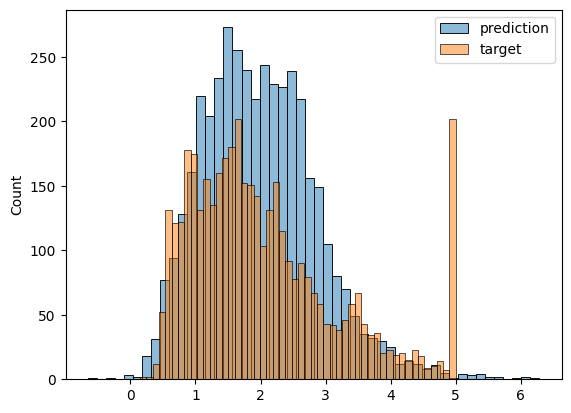

In [23]:
# change shape to 1D array, before passing to sns.histplot
sns.histplot(np.expm1(y_val_pred).ravel(), label='prediction', alpha=0.5, bins=50)
sns.histplot(np.expm1(y_val).ravel(), label='target', alpha=0.5, bins=50)
plt.legend()

### Combine train+val, and use test

In [24]:
n = df_data.shape[0]

# create an array with indices from 0 to n-1
idx = np.arange(n)

# shuffle idx
np.random.seed(42)
np.random.shuffle(idx)

# split train, test = 80%, 20%
n_test = int(n * 0.2)
n_train = n - n_val - n_test

print(n_train, n_test)

12384 4128


In [25]:
# create train, test dataframes

# train = 0 - n_train
X_train = df_data.iloc[idx[:n_train]]
y_train = df_target.iloc[idx[:n_train]]

# test = n_train+n_val - n
X_test = df_data.iloc[idx[n_train:]]
y_test = df_target.iloc[idx[n_train:]]

# reset index and convert to numpy arrays
X_train = X_train.reset_index(drop=True).to_numpy()
y_train = y_train.reset_index(drop=True).to_numpy()

X_test = X_test.reset_index(drop=True).to_numpy()
y_test = y_test.reset_index(drop=True).to_numpy()



In [26]:
# train
r = train_linear_regression(X_train, y_train)
w0, w = r[0], r[1]

print(w0)
print(w)

[-12.29679174]
[[ 0.7005905 ]
 [ 0.05461038]
 [-0.24799391]
 [ 0.56659225]
 [ 0.00566109]
 [-0.35725037]
 [-0.15347717]
 [-0.1510556 ]]


In [27]:
# do test
y_test_pred = w0 + X_test.dot(w)
#print(y_test_pred)

# calculate RMSE
rmse_test = rmse(y_test, y_test_pred).round(3)

print("rmse : ", rmse_test)

rmse :  0.204


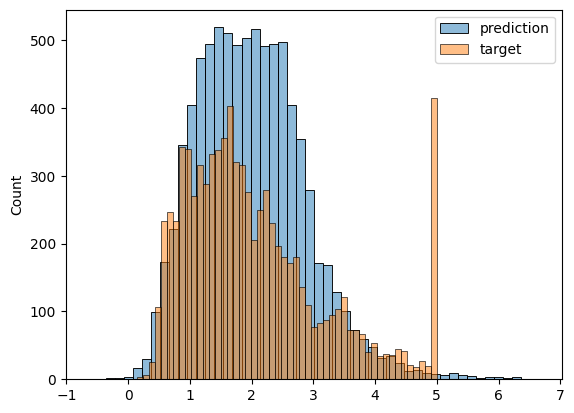

In [28]:
# change shape to 1D array, before passing to sns.histplot
sns.histplot(np.expm1(y_test_pred).ravel(), label='prediction', alpha=0.5, bins=50)
sns.histplot(np.expm1(y_test).ravel(), label='target', alpha=0.5, bins=50)
plt.legend()